In [1]:
import pandas as pd
import requests
import re

In [2]:
!pip install youtube-transcript-api #This library will obtain transcripts from youtube videos 

ERROR: Invalid requirement: '#This'

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\panas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import requests

def get_youtube_details(video_id, api_key):
    """
    Fetches video metadata and statistics from the YouTube Data API v3. 
    a link like this https://www.youtube.com/watch?v=6i7HrP84DMw&list=WL&index=2&ab_channel=BenjaminKeep%2CPhD%2CJD would be between the '=' and '&'
    i.e. 6i7HrP84DMw
    
    Parameters:
    - video_id (str): The YouTube video ID.
    - api_key (str): The API key to authenticate with the YouTube API.
    
    Returns:
    - dict: A dictionary containing video details like title, publish date, and statistics.
    """
    base_url = "https://www.googleapis.com/youtube/v3/videos"
    params = {
        "part": "snippet,statistics", # Fetches statistics
        "id": video_id, 
        "key": api_key
    }

    response = requests.get(base_url, params=params)
    data = response.json()
    
    # Check if the 'items' key exists in the API response
    if not data.get("items"):
        print("Error:", data)
        return None
    
    title = data["items"][0]["snippet"]["title"]
    published_at = data["items"][0]["snippet"]["publishedAt"]
    statistics = data["items"][0]["statistics"]
    
    return {
        "videoId": video_id,
        "title": title,
        "publishedAt": published_at,
        "statistics": statistics
    }

# Usage example:
video_id = 'jD9n01Mck0Q'
api_key = "YOUR_API_KEY"  # Replace with your actual YouTube API key
result = get_youtube_details(video_id, api_key)

# Output example
print(result["videoId"])
print(result["title"])
print(result["publishedAt"])
print(result["statistics"])


jD9n01Mck0Q
OnePlus Open is Awesome - What's Happening with Folding Phones?!
2023-10-19T15:01:16Z
{'viewCount': '3236879', 'likeCount': '102628', 'favoriteCount': '0', 'commentCount': '7299'}


In [27]:
from youtube_transcript_api import YouTubeTranscriptApi
from youtube_transcript_api.formatters import JSONFormatter

def getAndFormatTranscript(video_id):
    """
    gets the transcript of a youtube video
    
    Parameters:
    - video_id (str): Target video ID
    
    Returns:
    - str: A JSON string representation of the video transcript.
    
    """
    transcript = YouTubeTranscriptApi.get_transcript(video_id)
    text_formatter = JSONFormatter()
    return text_formatter.format_transcript(transcript)

# Usage example:
video_id = 'jD9n01Mck0Q'  # Replace with the desired YouTube video ID
transcript = getAndFormatTranscript(video_id)
print(transcript)


[{"text": "- All right, we gotta talk about these", "start": 0.63, "duration": 0.93}, {"text": "folding phones for a minute,", "start": 1.56, "duration": 0.84}, {"text": "because it's changed a lot\nsince the last time we did.", "start": 2.4, "duration": 2.46}, {"text": "So the first ever folding\nphone from OnePlus", "start": 4.86, "duration": 2.79}, {"text": "came out this week.", "start": 7.65, "duration": 0.99}, {"text": "It's called the OnePlus Open.", "start": 8.64, "duration": 2.246}, {"text": "Not a very good name,", "start": 10.886, "duration": 1.324}, {"text": "but a very, very, very good,", "start": 12.21, "duration": 2.46}, {"text": "first gen foldable.", "start": 14.67, "duration": 1.05}, {"text": "I've been using it for\nabout three weeks now.", "start": 15.72, "duration": 1.89}, {"text": "I got lots of good things to say about it,", "start": 17.61, "duration": 1.44}, {"text": "but it's actually, I\nfeel like it's so good,", "start": 19.05, "duration": 1.95}, {"text": "th

The above allows us to successfully obtain a video's statistics and well as the transcript of that video.

I condsidered training my own LDA model, however, I find that the amount of training data needed is too excessive for a quick project. As a result we will opt for a pre-built model from huggingFace.

In [28]:
#This obtains the full text of a particular transcrip
plainText = []
for dictionary in transcript:
    for key,value in dictionary.items():
      #  print(key,values)
        if key == 'text':
            print(value)
            plainText.append(value)
            plainText.append(' ')

full_transcript = ''.join(plainText)
print(full_transcript) #unpacks the transcript


- All right, we gotta talk about these
folding phones for a minute,
because it's changed a lot
since the last time we did.
So the first ever folding
phone from OnePlus
came out this week.
It's called the OnePlus Open.
Not a very good name,
but a very, very, very good,
first gen foldable.
I've been using it for
about three weeks now.
I got lots of good things to say about it,
but it's actually, I
feel like it's so good,
that it's actually resurfaced
the old question in my head
from a couple years ago, which is,
what's it gonna take for regular people
to actually start buying folding phones?
Because, yeah, I like this phone,
and I'm gonna go ahead and guess that
some other reviewers
will like this phone too,
and some enthusiasts will like this phone,
and this video may even
get a lot of views,
but none of that necessarily translates
into regular people just
like, strolling into a store,
or going online and choosing
to buy one of these.
So first things first,
the details of this phone.
So

In [29]:
Starts = []
Ends = []
#gets the start and end point for all sentnences.
for dictionary in transcript:
    if 'start' in dictionary:
        Starts.append(dictionary['start'])
    if 'start' in dictionary and 'duration' in dictionary: 
        Ends.append(dictionary['start'] + dictionary['duration'])

# If we can pick up gaps between sentences, we can split sentences like this
print("Starts:", Starts)
print("Ends:", Ends)


Starts: [0.63, 1.56, 2.4, 4.86, 7.65, 8.64, 10.886, 12.21, 14.67, 15.72, 17.61, 19.05, 21.0, 23.88, 26.07, 27.81, 30.21, 32.01, 33.57, 36.06, 38.1, 40.47, 43.47, 46.29, 49.74, 51.72, 55.71, 58.38, 60.75, 62.163, 66.15, 67.41, 69.6, 74.82, 76.44, 78.03, 81.66, 84.51, 87.69, 89.25, 91.05, 93.03, 94.44, 97.11, 100.08, 102.54, 105.48, 107.49, 109.65, 110.67, 113.4, 116.31, 118.56, 120.75, 121.583, 123.06, 124.5, 125.88, 127.08, 130.061, 131.94, 132.93, 134.34, 135.33, 138.06, 139.65, 142.02, 143.608, 145.53, 147.3, 150.33, 152.55, 153.93, 154.92, 157.17, 158.85, 161.533, 163.35, 165.84, 168.63, 171.48, 174.36, 178.29, 179.79, 181.23, 183.93, 186.21, 188.31, 191.01, 193.779, 196.74, 197.79, 199.29, 202.08, 205.83, 206.73, 207.78, 211.084, 213.03, 213.863, 215.01, 216.84, 218.46, 220.44, 221.82, 223.29, 225.834, 228.291, 230.97, 234.84, 236.28, 238.95, 240.45, 242.07, 244.648, 246.3, 248.13, 249.27, 252.48, 254.79, 257.64, 259.74, 262.95, 264.24, 266.52, 267.51, 269.1, 270.45, 272.82, 274.77

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt


# Calculate pauses
pauses = [Starts[0]]  # The first "pause" is the time until the first segment starts
for i in range(1, len(Starts)):
    pause = Starts[i] - Ends[i-1]
    pauses.append(pause)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Starts, pauses, marker='o', linestyle='-')
plt.xlabel('Start Time (seconds)')
plt.ylabel('Pause Duration (seconds)')
plt.title('Pauses in Transcript')
plt.grid(True)
plt.show()
# pauses will not be a good split point and the transcript does not identify the sentence pauses well.

In [31]:
!pip install transformers
!pip install tensorflow
!pip install DeepSegment
!pip install sentencepiece #necessary libraries


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\panas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\panas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
  Attempting uninstall: Keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.3.1 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\panas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#necessary'

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\panas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
!pip install tensorflow


  Obtaining dependency information for keras<2.14,>=2.13.1 from https://files.pythonhosted.org/packages/2e/f3/19da7511b45e80216cbbd9467137b2d28919c58ba1ccb971435cb631e470/keras-2.13.1-py3-none-any.whl.metadata
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seqtag-keras 1.0.6 requires Keras<=2.3.1, but you have keras 2.13.1 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\panas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [34]:
import tensorflow as tf
import sentencepiece
from transformers import T5Tokenizer, TFT5ForConditionalGeneration

In [35]:
#This will take in the sentences and return the appropriate punctuation etc. 
tokenizer = T5Tokenizer.from_pretrained('SJ-Ray/Re-Punctuate')
model = TFT5ForConditionalGeneration.from_pretrained('SJ-Ray/Re-Punctuate')
input_text = full_transcript
inputs = tokenizer.encode("punctuate: " + input_text, return_tensors="tf") 
result = model.generate(inputs)
decoded_output = tokenizer.decode(result[0], skip_special_tokens=True)
print(decoded_output) #punctuates the transcript


All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at SJ-Ray/Re-Punctuate.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Token indices sequence length is longer than the specified maximum sequence length for this model (3279 > 512). Running this sequence through the model will result in indexing errors


And, if you put this phone on a scale, and a little bit more open or closed, you can see it. And then, it's just, a lot of things. And, if you have a..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................


In [52]:
decoded_output

"Launching soon at 600 bucks. So that seems to be getting closer, but it's just, we need a lot more of that stuff. So, folding phones are simultaneously very evolved from their beginnings just a few years ago, and yet still have a long way to go. So I guess until we get there, it's more fun for us nerds. Thanks for watching! Catch you in the next one. Peace. (Child beats and uplifting strings music)"

In [36]:
# Function to split the input text into smaller chunks
#Each chunk is then punctuated and rejoined
def split_into_sentences(text, sentences_per_chunk=2):
    """Splits the input text into chunks, each containing a specified number of sentences."""
    sentences = text.split('.')
    chunks = []
    current_chunk = []
    for sentence in sentences:
        if len(current_chunk) < sentences_per_chunk:
            current_chunk.append(sentence.strip())
        else:
            chunks.append('. '.join(current_chunk) + '.')
            current_chunk = [sentence.strip()]
    if current_chunk:  # Add any remaining sentences
        chunks.append('. '.join(current_chunk) + '.')
    return chunks


def trim_excessive_fullstops(text):
    # Replace sequences of more than three full as occasionally happens with this library
    return re.sub(r'\.{3,}', '...', text)

chunks = split_into_sentences(full_transcript)
punctuated_chunks = []

for chunk in chunks:
    inputs = tokenizer.encode("punctuate: " + chunk, return_tensors="tf") 
    result = model.generate(inputs)
    decoded_output = tokenizer.decode(result[0], skip_special_tokens=True)
    punctuated_chunks.append(decoded_output)

punctuated_transcript = ' '.join(punctuated_chunks)
punctuated_transcript = trim_excessive_fullstops(punctuated_transcript)
print(punctuated_transcript) #returns the punctuated transcript. Time consuming so optionally save the data frame as an excel file


- All right, we gotta talk about these folding phones for a minute, because it's changed a lot since the last time we did. So the first ever folding phone from OnePlus came out this week. It's called the OnePlus Open. Not a very, very, very, very good, first gen foldable. I've been using it for about three weeks now. I feel like it's so good, that it's actually resurfaced the old question in my head from a couple Years ago, which is, what's it gonna take for regular people to actually start buying folding phones? Because, yeah, I like this phone, and I'm gonna go ahead and guess that some other reviewers will like this phone too, and some enthusiasts will like this phone, and this video may even get a lot of views, but none of that necessarily translates into regular people just like, strolling into a store, or going online and choosing to buy one of these. Details of this phone. So this is a super high-end phone in every way, and the design is particularly well considered. You can see

https://archive.ph/bnERw, https://huggingface.co/blog/bertopic . USeful articles for out usecase. I will be going forward with the aim being to use zero shot classification.

In [38]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli")
sequence_to_classify = ['flat edges']
candidate_labels = ["design", "Build quality", "battery", "camera","display"]
output = classifier(sequence_to_classify, candidate_labels, multi_label=True)
print(output) #Experimentation with zero-shot-classification without a template. Results were poor



C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\utils\data\dataloader.py:642: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x000001B2C69F91C0> was reported to be 1 (when accessing len(dataloader)), but 2 samples have been fetched. 
  warnings.warn(warn_msg)
C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\utils\data\dataloader.py:642: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x000001B2C69F91C0> was reported to be 1 (when accessing len(dataloader)), but 3 samples have been fetched. 
  warnings.warn(warn_msg)
C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\utils\data\dataloader.py:642: Use

[{'sequence': 'flat edges', 'labels': ['Build quality', 'design', 'display', 'camera', 'battery'], 'scores': [0.8192645311355591, 0.7975450158119202, 0.6983168125152588, 0.2018607258796692, 0.07166851311922073]}]


C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\utils\data\dataloader.py:642: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x000001B2C69F91C0> was reported to be 1 (when accessing len(dataloader)), but 5 samples have been fetched. 
  warnings.warn(warn_msg)


Here we note the difference between the multi-label and single label. single label the total must equal 1. with multi-label that context is taken out for each one and they are just given a percentage score.

From the docs, relaly useful info that you can use a hypothesis:
After that, the hypothesis template is defined. The default template is used by the Hugging Face pipeline is This example is {}, we use a hypothesis template that is more specific to the topic modeling The topic of this review is {}. and it helps to improve the results.

In [39]:
sequence_to_classify = ['flat edges']
candidate_labels = ["design", "build quality", "battery", "camera","display"] 
# Set the hyppothesis template
hypothesis_template = "The part of the phone review is in relation to {}."
output = classifier(sequence_to_classify, candidate_labels, hypothesis_template=hypothesis_template, multi_label=False)
print(output)
##Experimentation with zero-shot-classification with a template. Results were poor still poor although improved

C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\utils\data\dataloader.py:642: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x000001B252220B50> was reported to be 1 (when accessing len(dataloader)), but 2 samples have been fetched. 
  warnings.warn(warn_msg)


C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\utils\data\dataloader.py:642: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x000001B252220B50> was reported to be 1 (when accessing len(dataloader)), but 3 samples have been fetched. 
  warnings.warn(warn_msg)
C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\utils\data\dataloader.py:642: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x000001B252220B50> was reported to be 1 (when accessing len(dataloader)), but 4 samples have been fetched. 
  warnings.warn(warn_msg)
C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\utils\data\dataloader.py:642: Use

[{'sequence': 'flat edges', 'labels': ['display', 'design', 'build quality', 'camera', 'battery'], 'scores': [0.293100506067276, 0.2704662084579468, 0.1850365400314331, 0.18214286863803864, 0.0692538321018219]}]


In [53]:
#Example data frame from that and how the scores will line up
# Save the output as a dataframe
single_topic_prediction = pd.DataFrame(output)
# Take a look at the data
single_topic_prediction.head()

,sequence,labels,scores
0,flat edges,"[display, design, build quality, camera, battery]","[0.293100506067276, 0.2704662084579468, 0.1850..."


In [54]:
#split the transcipt into  sentences. A list of sentences is produced
from nltk.tokenize import sent_tokenize #tokenises the sentences so each is a separate list element
sentences = sent_tokenize(punctuated_transcript)
sentences

["- All right, we gotta talk about these folding phones for a minute, because it's changed a lot since the last time we did.",
 'So the first ever folding phone from OnePlus came out this week.',
 "It's called the OnePlus Open.",
 'Not a very, very, very, very good, first gen foldable.',
 "I've been using it for about three weeks now.",
 "I feel like it's so good, that it's actually resurfaced the old question in my head from a couple Years ago, which is, what's it gonna take for regular people to actually start buying folding phones?",
 "Because, yeah, I like this phone, and I'm gonna go ahead and guess that some other reviewers will like this phone too, and some enthusiasts will like this phone, and this video may even get a lot of views, but none of that necessarily translates into regular people just like, strolling into a store, or going online and choosing to buy one of these.",
 'Details of this phone.',
 'So this is a super high-end phone in every way, and the design is particu

In [55]:
#Hold x number of sentences at a time because processing an entire script simulteously makes things difficult
def batch_sentences(sentences, batch_size=2):
    batches = []  #hold batches of sentences
    for i in range(0, len(sentences), batch_size):  # Loop in steps of batch_size
        batch = sentences[i:i+batch_size]  # Extract a slice of sentences to form a batch
        batches.append(batch)  # Add this batch to the list of batches
    return batches
batched = batch_sentences(sentences)
batched # a list of two sentence lists.

flatBatch = []

for sublist in batched:
    combined = ' '.join(sublist)
    flatBatch.append(combined)

print(flatBatch)

["- All right, we gotta talk about these folding phones for a minute, because it's changed a lot since the last time we did. So the first ever folding phone from OnePlus came out this week.", "It's called the OnePlus Open. Not a very, very, very, very good, first gen foldable.", "I've been using it for about three weeks now. I feel like it's so good, that it's actually resurfaced the old question in my head from a couple Years ago, which is, what's it gonna take for regular people to actually start buying folding phones?", "Because, yeah, I like this phone, and I'm gonna go ahead and guess that some other reviewers will like this phone too, and some enthusiasts will like this phone, and this video may even get a lot of views, but none of that necessarily translates into regular people just like, strolling into a store, or going online and choosing to buy one of these. Details of this phone.", "So this is a super high-end phone in every way, and the design is particularly well considere

In [43]:
def batch_sentences_with_overlap(sentences, batch_size=3, overlap=1):
    """
    Splits a list of sentences into batches with a specified overlap between consecutive batches.
    Can manually carry over context from sentence to sentence
    """
    
    batches = []  
    i = 0
    while i < len(sentences):
        # Extract the next batch of sentences based on batch_size
        batch = sentences[i:i+batch_size]
        batches.append(batch)
        
        # Move the index by batch_size but pull it back by the overlap
        # This ensures the desired overlap between consecutive batches
        i += (batch_size - overlap)
    
    return batches

# The implementation of overlapping batches was explored to improve accuracy.
# However, there wasn't a significant enhancement in performance upon using this approach. (see below)

In [44]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli")
#Now implementing it with the hypothesis template

multiTopicPrediction = []
multiTopicScores = []
def classifySentence(batch):
    candidate_labels = ["Design", "Build quality", "Battery or Charging", "Camera","Screen or Display","Phone performance", "Price", "Unknown"]
    hypothesis_template = "The part of the phone review is in relation to the phone's {}."
    #combined_text = " ".join(batch)
    combined_text = batch
    output = classifier(combined_text, candidate_labels, hypothesis_template=hypothesis_template, multi_label=False)
    return {
        'combined_text': combined_text,
        'predicted_topics': output['labels'],
        'scores': output['scores']
    }


C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\transformers\convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [45]:
semantic_dict = {
    'DESIGN': ['flat edges'],
    
    'BUILD_QUALITY': ['speaker', 'glass'],
    
    'BATTERY_OR_CHARGING': ['fast charge', 'wireless charging', 'drain', 'screen on time', 'usage time'],
    
    'CAMERA': ['camera', 'lens', 'megapixel', 'MP', 'portrait', 'photo', 'image', 'picture', 'shutter', 'zoom', 'flash', 'low light', 'sensor', 'resolution', 'video', 'optical'],
    
    'SCREEN_OR_DISPLAY': ['hz', 'OLED', 'LCD', 'herz', 'nits', 'refresh rate','bezel'],
    
    'PHONE_PERFORMANCE': ['processor', 'CPU', 'GPU', 'RAM', 'memory', 'storage', 'multitasking']
}
#Using domain knowledge to do semantic replacement to improve accuracy

In [56]:
#now has our sentence parts as the original sentence
sentencesDF = pd.DataFrame(flatBatch, columns=['Original Sentences'])
sentencesDF

,Original Sentences
0,"- All right, we gotta talk about these folding..."
1,"It's called the OnePlus Open. Not a very, very..."
2,I've been using it for about three weeks now. ...
3,"Because, yeah, I like this phone, and I'm gonn..."
4,So this is a super high-end phone in every way...
...,...
76,And Motorola just launched their most affordab...
77,"So that seems to be getting closer, but it's j..."
78,"So I guess until we get there, it's more fun f..."
79,Catch you in the next one. Peace.


In [58]:
#Do some semantic replacement as we know the key terms
for key, values in semantic_dict.items():
    for value in values:
         sentencesDF['processedSentences'] = sentencesDF['Original Sentences'].str.replace(r'\b' + value + r'\b', key, regex=True)
sentencesDF


,Original Sentences,processedSentences
0,"- All right, we gotta talk about these folding...","- All right, we gotta talk about these folding..."
1,"It's called the OnePlus Open. Not a very, very...","It's called the OnePlus Open. Not a very, very..."
2,I've been using it for about three weeks now. ...,I've been using it for about three weeks now. ...
3,"Because, yeah, I like this phone, and I'm gonn...","Because, yeah, I like this phone, and I'm gonn..."
4,So this is a super high-end phone in every way...,So this is a super high-end phone in every way...
...,...,...
76,And Motorola just launched their most affordab...,And Motorola just launched their most affordab...
77,"So that seems to be getting closer, but it's j...","So that seems to be getting closer, but it's j..."
78,"So I guess until we get there, it's more fun f...","So I guess until we get there, it's more fun f..."
79,Catch you in the next one. Peace.,Catch you in the next one. Peace.


In [59]:
results = []

# Loop through each batch and classify
for sentencePair in sentencesDF['processedSentences']:
    print(sentencePair)
    result = classifySentence(sentencePair)
    results.append(result)

# Convert the list of results to a DataFrame
df = pd.DataFrame(results)
df.head() #classified with zero shot classification

- All right, we gotta talk about these folding phones for a minute, because it's changed a lot since the last time we did. So the first ever folding phone from OnePlus came out this week.
It's called the OnePlus Open. Not a very, very, very, very good, first gen foldable.
I've been using it for about three weeks now. I feel like it's so good, that it's actually resurfaced the old question in my head from a couple Years ago, which is, what's it gonna take for regular people to actually start buying folding phones?
Because, yeah, I like this phone, and I'm gonna go ahead and guess that some other reviewers will like this phone too, and some enthusiasts will like this phone, and this video may even get a lot of views, but none of that necessarily translates into regular people just like, strolling into a store, or going online and choosing to buy one of these. Details of this phone.
So this is a super high-end phone in every way, and the design is particularly well considered. You can see

,combined_text,predicted_topics,scores
0,"- All right, we gotta talk about these folding...","[Design, Screen or Display, Unknown, Phone per...","[0.8012409210205078, 0.09489931166172028, 0.04..."
1,"It's called the OnePlus Open. Not a very, very...","[Screen or Display, Design, Phone performance,...","[0.40145158767700195, 0.17197273671627045, 0.1..."
2,I've been using it for about three weeks now. ...,"[Unknown, Phone performance, Design, Screen or...","[0.527259886264801, 0.18669568002223969, 0.139..."
3,"Because, yeah, I like this phone, and I'm gonn...","[Screen or Display, Design, Unknown, Phone per...","[0.31458666920661926, 0.17782963812351227, 0.1..."
4,So this is a super high-end phone in every way...,"[Design, Build quality, Screen or Display, Pri...","[0.7247847318649292, 0.1938474327325821, 0.034..."


In [50]:
#we now have scores inthe DF
df.to_csv('rawLabelNoLoss.csv', index=False)
noLossnoStopWordsDF = df #save in order to save time in future runs

In [ ]:
trueLabelcsv = pd.read_csv(r"\labelled.csv") #manually labelled data and returned it for accuracy assessment

In [60]:
noLossnoStopWordsDF.head()

,combined_text,predicted_topics,scores
0,"- All right, we gotta talk about these folding...","[Design, Screen or Display, Unknown, Phone per...","[0.8012409210205078, 0.09489931166172028, 0.04..."
1,"It's called the OnePlus Open. Not a very, very...","[Screen or Display, Design, Phone performance,...","[0.40145158767700195, 0.17197273671627045, 0.1..."
2,I've been using it for about three weeks now. ...,"[Unknown, Phone performance, Design, Screen or...","[0.527259886264801, 0.18669568002223969, 0.139..."
3,"Because, yeah, I like this phone, and I'm gonn...","[Screen or Display, Design, Unknown, Phone per...","[0.31458666920661926, 0.17782963812351227, 0.1..."
4,So this is a super high-end phone in every way...,"[Design, Build quality, Screen or Display, Pri...","[0.7247847318649292, 0.1938474327325821, 0.034..."


In [ ]:
df
noLossnoStopWordsDFLabels = [x[0] for x in noLossnoStopWordsDF['predicted_topics']] #first prediction is chosen as the rpesdicted label
Truelabels = trueLabelcsv['trueLabel']
all_labels = ['Screen or Display', 'Design', 'Unknown', 'Build quality', 'Battery or Charging', 'Camera', 'Phone performance', 'Price']


In [ ]:
!pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


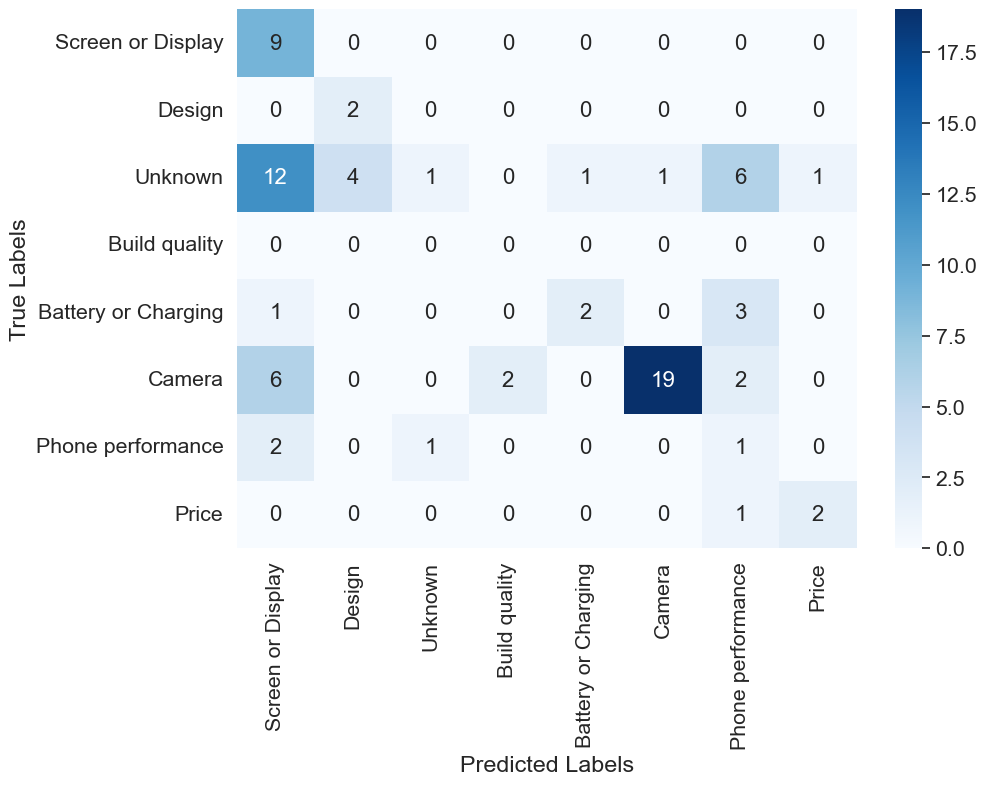

Accuracy: 0.4557
Precision: 0.6358
Recall: 0.4557
F1 Score: 0.4385

Classification Report:

                     precision    recall  f1-score   support

  Screen or Display       0.67      0.33      0.44         6
             Design       0.00      0.00      0.00         0
            Unknown       0.95      0.66      0.78        29
      Build quality       0.33      1.00      0.50         2
Battery or Charging       0.08      0.25      0.12         4
             Camera       0.67      0.67      0.67         3
  Phone performance       0.30      1.00      0.46         9
              Price       0.50      0.04      0.07        26

           accuracy                           0.46        79
          macro avg       0.44      0.49      0.38        79
       weighted avg       0.64      0.46      0.44        79



C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall an

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_classifier(true_labels, predicted_labels, all_labels): #Confusion matrix heatmap to assess accuracy
    # Get the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=all_labels)

    # Convert the confusion matrix to a Pandas DataFrame for better labeling
    df_cm = pd.DataFrame(cm, columns=all_labels, index=all_labels)

    # Plot the heatmap
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues", 
                xticklabels=all_labels, yticklabels=all_labels)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n")
    print(classification_report(true_labels, predicted_labels, target_names=all_labels))
evaluate_classifier(Truelabels, noLossnoStopWordsDFLabels, all_labels) #Low accuracy


In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\panas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!pip install textblob 

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def lemmantise(sentence):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_sentence = ' '.join(lemmatized_words)
    return lemmatized_sentence
stop_words = set(stopwords.words('english')) #lemantising in order to assess if this will improve classification accuracy
def preprocessText(sentence):
    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]', '', sentence)
    word_tokens = nltk.word_tokenize(sentence)
    filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]
   # finalSentence = filtered_sentence.apply(lemmantise)
    finalSentence = [lemmantise(word) for word in filtered_sentence]
    return ' '.join(finalSentence)

processedSentences = []
count = 0
for i in dfToProcess['combined_text']:
    print(i)
    x = preprocessText(i)
    print(x)
    count += 1
    print(count)
    processedSentences.append(x)
dfToProcess = dfToProcess.drop(['processed Sentence', 'predicted_topics', 'scores'], axis=1)
dfToProcess.insert(1, 'processed Sentence', processedSentences)
dfToProcess


Now let's evaluate the accuracy when working on the processed text

In [ ]:
dfToProcess
resultsonpreprocessed = []
for key, values in semantic_dict.items():
    for value in values:
         dfToProcess['sentencestoassess'] = dfToProcess['processed Sentence'].str.replace(r'\b' + value + r'\b', key, regex=True)
for sentencePair in dfToProcess['sentencestoassess']:
    print(sentencePair)
    result = classifySentence(sentencePair)
    resultsonpreprocessed.append(result)

# Convert the list of results to a DataFrame
dfOnPreProcessedText = pd.DataFrame(resultsonpreprocessed)

In [ ]:
dfOnPreProcessedText
dfLabelsPreProcessed = [x[0] for x in dfOnPreProcessedText['predicted_topics']]
dfLabelsPreProcessed

#Very slight improvement on the prior performance. We are really going to have to sell that it improved.

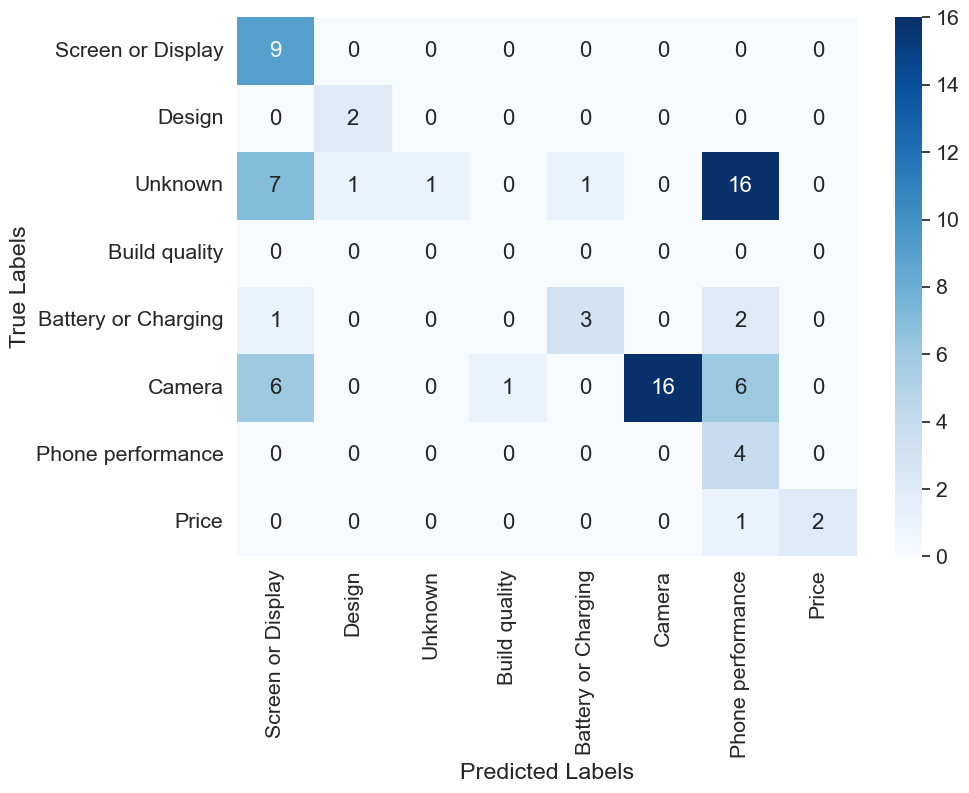

Accuracy: 0.4684
Precision: 0.8596
Recall: 0.4684
F1 Score: 0.4580

Classification Report:

                     precision    recall  f1-score   support

  Screen or Display       0.75      0.50      0.60         6
             Design       0.00      0.00      0.00         0
            Unknown       1.00      0.55      0.71        29
      Build quality       0.67      1.00      0.80         2
Battery or Charging       0.14      1.00      0.24         4
             Camera       1.00      0.67      0.80         3
  Phone performance       0.39      1.00      0.56         9
              Price       1.00      0.04      0.07        26

           accuracy                           0.47        79
          macro avg       0.62      0.59      0.47        79
       weighted avg       0.86      0.47      0.46        79



C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall an

In [ ]:
evaluate_classifier(Truelabels, dfLabelsPreProcessed, all_labels) #even after processing the accuracy is low


In [ ]:
dfForLossFunction = dfToProcess.drop(['combined_text', 'processed Sentence'], axis=1)
dfForLossFunction

,sentencestoassess
0,music hey whats mkbhd brand new galaxy s22 ult...
1,review swear make video without making joke re...
2,best really like took name phone samsung givin...
3,using called s22 ultra let get
4,word ultra samsungs lineup basically come mean...
...,...
74,want specific extra thing thats great phone wa...
75,obviously people phone dont need upgrade basic...
76,performance uh design prefer vibration motor a...
77,ill leave like button want watch real quick th...


In [ ]:
losslist = []
for sentencePair in dfForLossFunction['sentencestoassess']:
    print(sentencePair)
    result = classifySentence(sentencePair)
    losslist.append(result)

# Convert the list of results to a DataFrame
dfReadyForLoss = pd.DataFrame(losslist)

music hey whats mkbhd brand new galaxy s22 ultra ive using two week promise im going call note 22 ultra
review swear make video without making joke really bottom line understand phone
best really like took name phone samsung giving money galaxy note phone im reviewing review swear make video without making joke really bottom line understand phone
using called s22 ultra let get
word ultra samsungs lineup basically come mean highest ambition biggest number best spec feature overall ultra name swallowed note stuff
note used one special edition phone squaredoff design flat top bottom pen built thats wrapped ultra s22 ultra miss beat s22 ultra biggest number best spec feature ultra stuff
theyre packing highest end ship
thats snapdragon 8gen one u massive new cooling solution alongside ram technically last year
base model eight gig rest 12 there 16 gig version honestly dont miss
cant imagine someone really needing 16 gig ram phone right absolutely go one terabyte nonexpandable storage though

In [ ]:
def boost_based_on_context(df, threshold=0.4, boost=0.1):
    '''"The goal is to carry over some context from tsentence to sentence.'''
    # Create a new column for the previous top topic
    df['previous_topic'] = df['predicted_topics'].str[0].shift(1)
    df['previous_score'] = df['scores'].str[0].shift(1)
    
    for idx, row in df.iterrows():
        # If it's the first row, continue
        if idx == 0:
            continue
        
        # Check if the previous score is above the threshold
        if row['previous_score'] > threshold:
            # Find the index of the previous topic in the current row's predicted topics
            if row['previous_topic'] in row['predicted_topics']:
                prev_topic_idx = row['predicted_topics'].index(row['previous_topic'])
                # Apply the boost
                df.at[idx, 'scores'][prev_topic_idx] += boost
                
                # If after boosting, the order changes, adjust the order
                if prev_topic_idx > 0 and df.at[idx, 'scores'][prev_topic_idx] > df.at[idx, 'scores'][prev_topic_idx-1]:
                    # Swap topics
                    df.at[idx, 'predicted_topics'][prev_topic_idx], df.at[idx, 'predicted_topics'][prev_topic_idx-1] = df.at[idx, 'predicted_topics'][prev_topic_idx-1], df.at[idx, 'predicted_topics'][prev_topic_idx]
                    # Swap scores
                    df.at[idx, 'scores'][prev_topic_idx], df.at[idx, 'scores'][prev_topic_idx-1] = df.at[idx, 'scores'][prev_topic_idx-1], df.at[idx, 'scores'][prev_topic_idx]
                    
    # Drop the added columns
    df = df.drop(['previous_topic', 'previous_score'], axis=1)
    return df

# Apply the function
boosted_df = boost_based_on_context(dfReadyForLoss) #context boost. still poor performace


In [ ]:
boostedDFLabels = [x[0] for x in boosted_df['predicted_topics']]

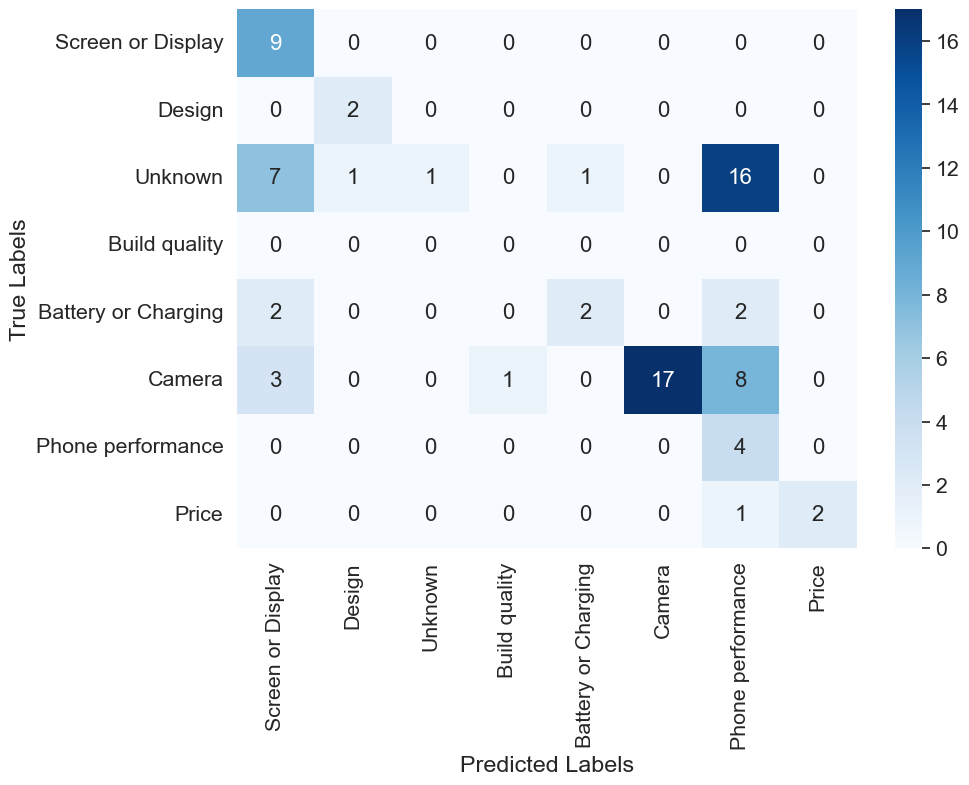

Accuracy: 0.4684
Precision: 0.8570
Recall: 0.4684
F1 Score: 0.4600

Classification Report:

                     precision    recall  f1-score   support

  Screen or Display       0.67      0.33      0.44         6
             Design       0.00      0.00      0.00         0
            Unknown       1.00      0.59      0.74        29
      Build quality       0.67      1.00      0.80         2
Battery or Charging       0.13      1.00      0.23         4
             Camera       1.00      0.67      0.80         3
  Phone performance       0.43      1.00      0.60         9
              Price       1.00      0.04      0.07        26

           accuracy                           0.47        79
          macro avg       0.61      0.58      0.46        79
       weighted avg       0.86      0.47      0.46        79



C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\panas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall an

In [ ]:
evaluate_classifier(Truelabels, boostedDFLabels, all_labels) #Manual training needed

*Performace with off the shelf models was poor so training my own model will be necessary*